In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
gp_pulses = pd.read_csv('crab_gp_kaz_pulses_2020-07-31.csv',  sep='\t')
crab_sessoins = pd.read_csv('crab_session_kaz_2020-07-31.csv',  sep='\t')

In [9]:
gp_pulses['Time_series'] = pd.to_datetime(gp_pulses['Date'], format='%d.%m.%Y', errors='ignore')
gp_pulses = gp_pulses.set_index('Time_series')
crab_sessoins['Time_series'] = pd.to_datetime(crab_sessoins['Date'], format='%d.%m.%Y', errors='ignore')
crab_sessoins = crab_sessoins.set_index('Time_series')

In [10]:
gp_pulses

,Date,Time start,MJD,"Median, Jy","amp of gp, Jy","W50, point","W10, point","W50_19D_poly, point","W10_19D_poly, point","W50_fit_func, point","W10_fit_func, point","E_19D_poly, Jy*ms","E_fit_func, Jy*ms","Tay, ms","STD, Jy","STD_without_pulse, Jy"
Time_series,,,,,,,,,,,,,,,,
2010-02-13,13.02.2010,20:26:28.9413394,55240.686525,1744.818640,269.376400,8.41850,63.16855,33.3888,64.1284,44.4222,138.0914,32034.832898,28898.736355,2.4576,42.117403,41.890580
2010-09-04,04.09.2010,07:08:21.3085403,55443.131314,1717.647895,176.650285,17.00090,30.15760,34.3582,80.6304,25.2044,76.9230,21617.568980,12872.655870,2.4576,36.229961,35.997642
2010-09-04,04.09.2010,07:08:21.3085403,55443.131314,1717.647895,158.318875,8.15030,39.28385,32.4268,68.7682,41.2328,128.1532,18285.165509,15387.322591,2.4576,36.229961,35.997642
2010-09-05,05.09.2010,07:04:25.4187240,55444.129131,1718.033010,411.753190,11.70395,49.80325,22.0594,132.5044,23.8058,72.8308,32351.377388,28987.203741,2.4576,41.160847,40.701186
2010-09-05,05.09.2010,07:04:25.4187240,55444.129131,1718.033010,228.012950,2.10090,32.54905,22.5034,129.2706,55.7368,137.2626,18275.520758,22147.841144,2.4576,41.160847,40.701186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,58745.092433,1768.598620,532.104680,2.80865,10.62370,18.2188,73.7558,13.1276,38.1692,34528.598796,15146.642242,2.4576,126.952082,108.705018
2019-09-19,19.09.2019,06:10:37.7614097,58745.092433,1768.598620,523.599620,3.59835,8.67925,13.4606,33.6626,5.6610,17.4714,25103.012891,8693.608264,2.4576,126.952082,108.705018
2019-09-19,19.09.2019,06:10:37.7614097,58745.092433,1768.598620,518.702890,5.26715,10.51940,15.1256,36.7188,7.3778,21.9040,27944.309744,11139.963115,2.4576,126.952082,108.705018


In [11]:
gp_pulses['Count of GP, u'] = 1
gp_crab_m_full = gp_pulses['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_full.join(gp_crab_m_ses, how='outer')

In [12]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


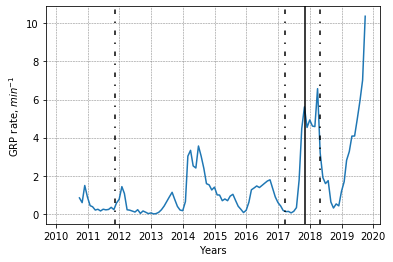

In [13]:
plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'])
plt.axvline('2011-11-10', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='black') # strongest glitch
plt.axvline('2018-04-29', color='black', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

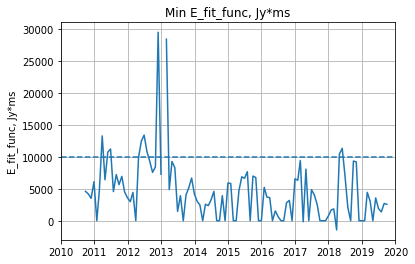

In [14]:
gp_table_full_E_m = gp_pulses['E_fit_func, Jy*ms'].resample('M').min().to_frame()
plt.close()
plt.title('Min E_fit_func, Jy*ms')
plt.ylabel('E_fit_func, Jy*ms')
plt.axhline(10000, ls='--')
plt.plot(gp_table_full_E_m['E_fit_func, Jy*ms']) #/np.max(gp_table_full_E_m['E_fit_func, Jy*ms']))
plt.xlim('2010', '2020')
plt.grid()
plt.show()

In [8]:
gp_table_E_cut = gp_pulses.where(
    gp_pulses['E_fit_func, Jy*ms'] > 10000).dropna().reset_index(drop=True)
gp_table_E_cut['Time_series'] = pd.to_datetime(
    gp_table_E_cut['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_E_cut = gp_table_E_cut.set_index('Time_series')

In [9]:
gp_table_E_cut_m = gp_table_E_cut['Count of GP, u'].resample('M').sum().to_frame()
result_crab = gp_table_E_cut_m.join(gp_crab_m_ses, how='outer')

In [10]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

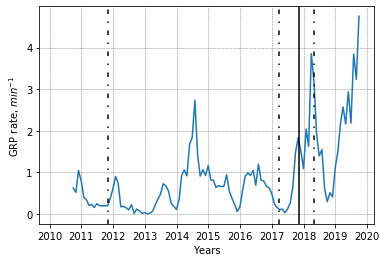

In [11]:
plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'])
plt.axvline('2011-11-10', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='black') # strongest glitch
plt.axvline('2018-04-29', color='black', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

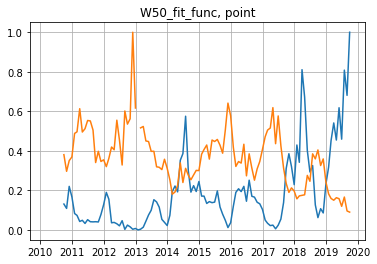

In [12]:
gp_table_full_w_m = gp_table_E_cut['W50_fit_func, point'].resample('M').mean().to_frame()
plt.close()
plt.title('W50_fit_func, point')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_w_m['W50_fit_func, point']/np.max(gp_table_full_w_m['W50_fit_func, point']))
plt.grid()
plt.show()

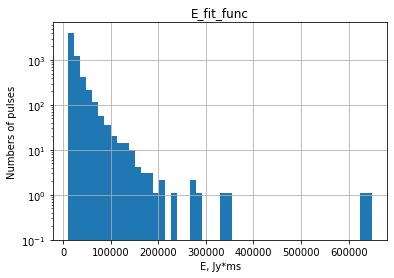

In [13]:
fig, ax = plt.subplots()
gp_table_E_cut['E_fit_func, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E_fit_func')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
#ax.set_xscale('log')

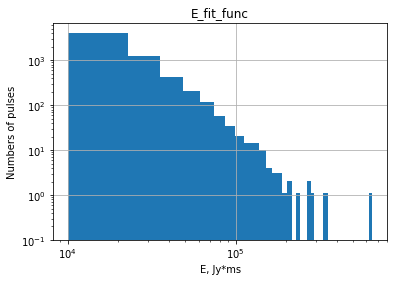

In [14]:
fig, ax = plt.subplots()
gp_table_E_cut['E_fit_func, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E_fit_func')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
ax.set_xscale('log')